In [ ]:
#Basic Implementation of simple RNN
import numpy as np
#Defining sigmoid activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

#Defining Hyperbolic Tangent(Tanh) activation function
def tanh(x):
  return np.tanh(x)

#Defining the derivative of tanh activation function
def tanh_derivative(x):
  return 1-np.tanh(x)**2
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialise weights and biases
        self.W_hx = np.random.randn(hidden_size, input_size)
        self.W_hh = np.random.randn(hidden_size, hidden_size)
        self.W_yh = np.random.randn(output_size, hidden_size)
        self.b_h = np.zeros((hidden_size, 1))
        self.b_y = np.zeros((output_size, 1))

    def forward(self, x):
        # Initialize hidden state
        h = np.zeros((self.W_hx.shape[0], 1))

        # List to store intermediate values
        self.h_states = []
        self.x_inputs = []

        for t in range(len(x)):
            # Update hidden state
            h = tanh(np.dot(self.W_hx, x[t]) + np.dot(self.W_hh, h) + self.b_h)
            self.h_states.append(h)
            self.x_inputs.append(x[t])

        # Calculate output
        y = np.dot(self.W_yh, h) + self.b_y
        return y, h

    def backward(self, x, y_true, learning_rate):
        # Initialize Gradients
        dw_hx, dw_hh, dw_yh = np.zeros_like(self.W_hx), np.zeros_like(self.W_hh), np.zeros_like(self.W_yh)
        db_h, db_y = np.zeros_like(self.b_h), np.zeros_like(self.b_y)
        dh_next = np.zeros_like(self.h_states[0])

        for t in reversed(range(len(x))):
            # Compute Gradients
            dy = y_true - x[t]
            dw_yh += np.dot(dy, self.h_states[t].T)
            db_y += dy
            dh = np.dot(self.W_yh.T, dy) + dh_next
            dh_raw = tanh_derivative(self.h_states[t]) * dh
            db_h += dh_raw
            dw_hx += np.dot(dh_raw, self.x_inputs[t].T)
            dw_hh += np.dot(dh_raw, self.h_states[t-1].T)
            dh_next = np.dot(self.W_hh.T, dh_raw)

        # Update weights and biases
        self.W_hx += learning_rate * dw_hx
        self.W_hh += learning_rate * dw_hh
        self.W_yh += learning_rate * dw_yh
        self.b_h += learning_rate * db_h
        self.b_y += learning_rate * db_y


In [ ]:
#Sequence Prediction in RNN
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

#Generate sample data
np.random.seed(0)
X=np.array([[i+j for j in range(5)] for i in range(100)])
y=np.array([i+5 for i in range(100)])
print("X array: ",X)
print("Y array: ",y)
#Reshape data for RNN input(Sample,time step,feature)
X=X.reshape((X.shape[0],X.shape[1],1))
X
#Define RNN model
model=Sequential([SimpleRNN(units=32,input_shape=(X.shape[1],X.shape[2]),activation='relu'),Dense(1)])
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#Train the model
model.fit(X,y,epochs=10,batch_size=8)
#Test the model
test_input=np.array([[i+j for j in range(5)] for i in range(100,110)])
test_input=test_input.reshape(test_input.shape[0],test_input.shape[1],1)
predicted_output=model.predict(test_input)

#Predicted Output
print("Predicted Output: ")
print(predicted_output.flatten())

X array:  [[  0   1   2   3   4]
 [  1   2   3   4   5]
 [  2   3   4   5   6]
 [  3   4   5   6   7]
 [  4   5   6   7   8]
 [  5   6   7   8   9]
 [  6   7   8   9  10]
 [  7   8   9  10  11]
 [  8   9  10  11  12]
 [  9  10  11  12  13]
 [ 10  11  12  13  14]
 [ 11  12  13  14  15]
 [ 12  13  14  15  16]
 [ 13  14  15  16  17]
 [ 14  15  16  17  18]
 [ 15  16  17  18  19]
 [ 16  17  18  19  20]
 [ 17  18  19  20  21]
 [ 18  19  20  21  22]
 [ 19  20  21  22  23]
 [ 20  21  22  23  24]
 [ 21  22  23  24  25]
 [ 22  23  24  25  26]
 [ 23  24  25  26  27]
 [ 24  25  26  27  28]
 [ 25  26  27  28  29]
 [ 26  27  28  29  30]
 [ 27  28  29  30  31]
 [ 28  29  30  31  32]
 [ 29  30  31  32  33]
 [ 30  31  32  33  34]
 [ 31  32  33  34  35]
 [ 32  33  34  35  36]
 [ 33  34  35  36  37]
 [ 34  35  36  37  38]
 [ 35  36  37  38  39]
 [ 36  37  38  39  40]
 [ 37  38  39  40  41]
 [ 38  39  40  41  42]
 [ 39  40  41  42  43]
 [ 40  41  42  43  44]
 [ 41  42  43  44  45]
 [ 42  43  44  45  46]
 

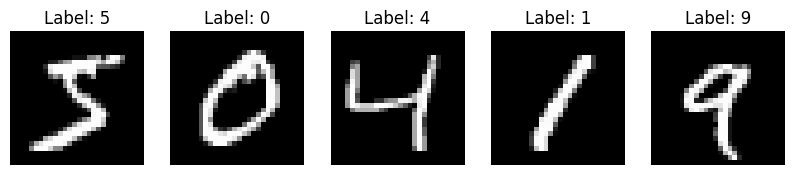

Epoch 1/10
750/750 [==============================] - 7s 7ms/step - loss: 1.0706 - accuracy: 0.6484 - val_loss: 0.6147 - val_accuracy: 0.8145
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.5650 - accuracy: 0.8305 - val_loss: 0.4505 - val_accuracy: 0.8693
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.4224 - accuracy: 0.8744 - val_loss: 0.3757 - val_accuracy: 0.8867
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 0.3640 - accuracy: 0.8930 - val_loss: 0.2928 - val_accuracy: 0.9176
Epoch 5/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3218 - accuracy: 0.9064 - val_loss: 0.2777 - val_accuracy: 0.9205
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2972 - accuracy: 0.9143 - val_loss: 0.2711 - val_accuracy: 0.9205
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2789 - accuracy: 0.9214 - val_loss: 0.2680 - val_accuracy: 0.9216
Epoc

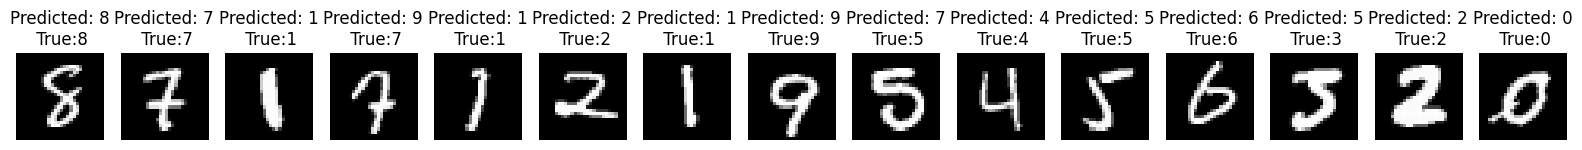

In [ ]:
#MNIST Dataset in RNN for classification
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense
from keras.datasets import mnist
from keras.utils import to_categorical

#Loading MNIST dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

#Print dataset
plt.figure(figsize=(10,8))
for i in range(5):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i],cmap='gray')
  plt.title(f"Label: {train_labels[i]}")
  plt.axis('off')

plt.show()
#Preprocess Data
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
#Build RNN model
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(28,28)))
model.add(Dense(units=10,activation='softmax')) #For Multiclassification
#Compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Reshaping input data for RNN
train_images_RNN=train_images.reshape((60000,28,28))
test_images_RNN=test_images.reshape((10000,28,28))

#Training the model
history=model.fit(train_images_RNN,train_labels,epochs=10,batch_size=64,validation_split=0.2)
#Evaluate model on test data
test_loss,test_acc=model.evaluate(test_images_RNN,test_labels)
print("Test Accuracy: ",test_acc)

#Function to predict and visualize results on new images
def predict_and_visualize(model,images,labels):
  predictions=model.predict(images)
  num_images=len(images)
  plt.figure(figsize=(20,3))
  for i in range(num_images):
    plt.subplot(1,num_images,i+1)
    plt.imshow(images[i].reshape((28,28)),cmap='green')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\n True:{np.argmax(labels[i])}")
    plt.axis('off')

plt.show()
#Chose some random test iages for prediction
num_images_to_predict=15
random_indices=np.random.choice(len(test_images_RNN),num_images_to_predict,replace=False)
images_to_predict=test_images_RNN[random_indices]
labels_to_predict=test_labels[random_indices]

#Predict and visualize results
predict_and_visualize(model,images_to_predict,labels_to_predict)

In [ ]:
#Assignment-1
#Sequence Prediction in RNN
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

#Generate sample data
np.random.seed(0)
X = np.array([[i*2 for i in range(1, 6)]])
y = np.array([[i*2 for i in range(6, 9)]])
print("X array: ",X)
print("y array: ",y)
for _ in range(9):
    X = np.append(X, [np.roll(X[-1], 1)], axis=0)
    y = np.append(y, [np.roll(y[-1], 1)], axis=0)
#Reshape data for RNN input(Sample,time step,feature)
X=X.reshape((X.shape[0],X.shape[1],1))
X
#Define RNN model
model=Sequential([SimpleRNN(units=32,input_shape=(X.shape[1],X.shape[2]),activation='relu'),Dense(1)])
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
#Train the model
model.fit(X,y,epochs=10,batch_size=8)
#Test the model
test_input=np.array([[i+j for j in range(5)] for i in range(10,20)])
test_input=test_input.reshape(test_input.shape[0],test_input.shape[1],1)
predicted_output=model.predict(test_input)

#Predicted Output
print("Predicted Output: ")
print(predicted_output.flatten())

X array:  [[ 2  4  6  8 10]]
y array:  [[12 14 16]]
Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 279.9911
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 257.3150
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 235.7290
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 215.3068
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 194.5093
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 174.3178
Epoch 7/10
2/2 [==============================] - 0s 10ms/step - loss: 154.8060
Epoch 8/10
2/2 [==============================] - 0s 9ms/step - loss: 135.3081
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 117.8474
Epoch 10/10
1/1 [==============================] - 0s 170ms/step
Predicted Output: 
[ 9.623546  10.4394045 11.255269  12.071128  12.88699   13.702851
 14.518715  15.334577  16.150436  16.966295 ]
